## YB 1조 프로젝트 중간 발표

### 1. 문제 정의
#### 구내식당 식수 인원 예측

![데이콘](캡처.PNG)

### 2. 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [5]:
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [7]:
submission.head(2)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      50 non-null     object
 1   중식계     50 non-null     int64 
 2   석식계     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


### 3. 데이터 전처리

##### 날짜 및 요일

In [9]:
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week
train['요일'] = train['일자'].dt.weekday

test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.week
test['요일'] = test['일자'].dt.weekday

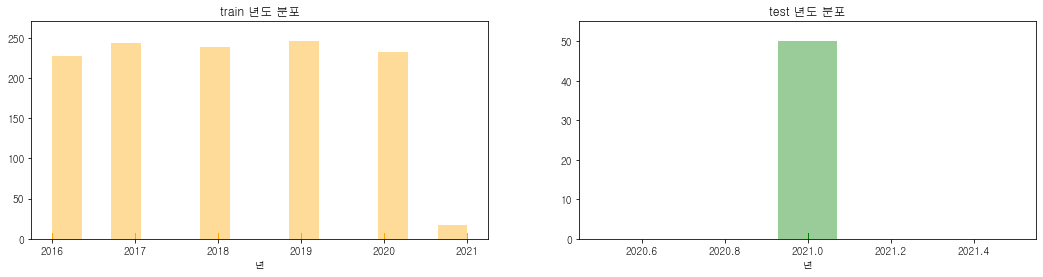

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train['년'], ax = ax[0], color = 'orange', kde = False, rug = True).set_title('train 년도 분포')
sns.distplot(test['년'], ax = ax[1], color = 'green', kde = False, rug = True).set_title('test 년도 분포')
plt.show() 

# train 년도: 2016 ~ 2021초, test 년도: 2021

##### 본사정원수

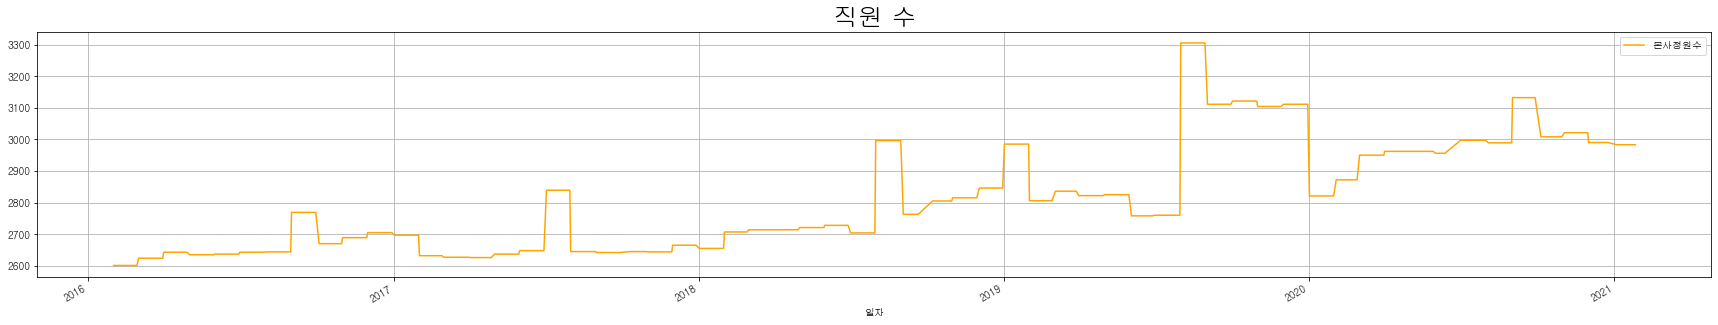

In [11]:
train1 = train[['일자','본사정원수']]
train1.plot(x = '일자', y = '본사정원수', figsize = (30, 5), grid = True, color='orange')
plt.title('직원 수', fontsize = 25)
plt.show()

# 직원수 증가 추세

Text(0.5, 1.0, '본사정원수 분포')

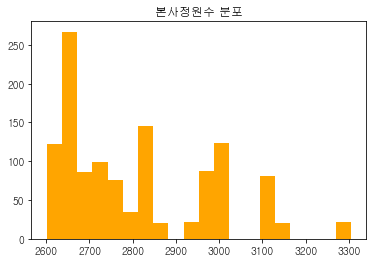

In [12]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['본사정원수'], bins=20, color='orange')
axes1.set_title('본사정원수 분포')

# 직원수 2600 ~ 3300명

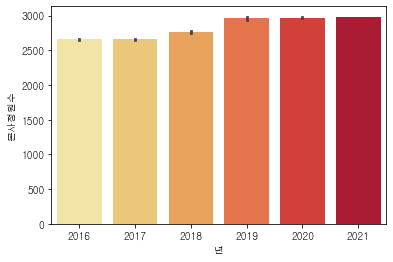

In [13]:
ax=plt.subplots()
ax=sns.set_palette("YlOrRd")
ax=sns.barplot(x='년', y='본사정원수', data=train)

# 년도별 직원수 증가

##### 본사휴가자수

Text(0.5, 1.0, '본사휴자가수 분포')

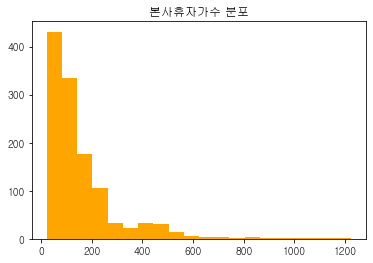

In [14]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['본사휴가자수'], bins=20, color='orange')
axes1.set_title('본사휴자가수 분포')

# 휴가자수 0 ~ 1200명, 없는 날 대부분

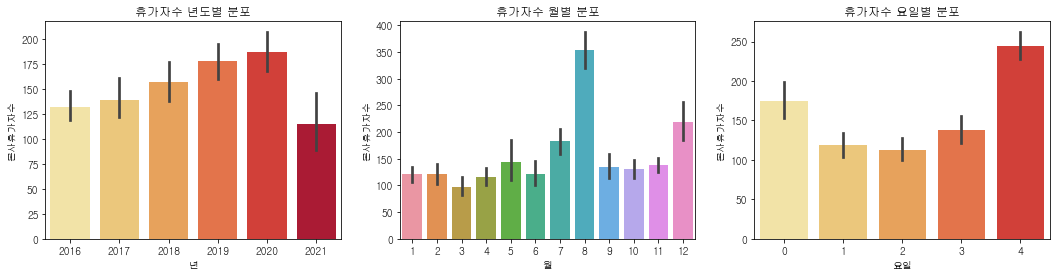

In [15]:
fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
sns.barplot(x='년', y='본사휴가자수', data=train, ax = ax[0]).set_title('휴가자수 년도별 분포')
sns.barplot(x='월', y='본사휴가자수', data=train, ax = ax[1]).set_title('휴가자수 월별 분포')
sns.barplot(x='요일', y='본사휴가자수', data=train, ax = ax[2]).set_title('휴가자수 요일별 분포')
plt.show()

# 년도별 휴가자수 증가
# 8월 휴가자수 최대
# 금요일 휴가자수 최대

##### 본사출장자수

Text(0.5, 1.0, '본사출장자 분포')

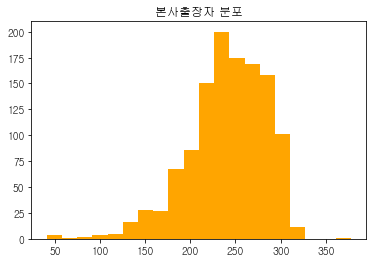

In [16]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['본사출장자수'], bins=20, color='orange')
axes1.set_title('본사출장자 분포')

# 출장자수 200~300명 대부분

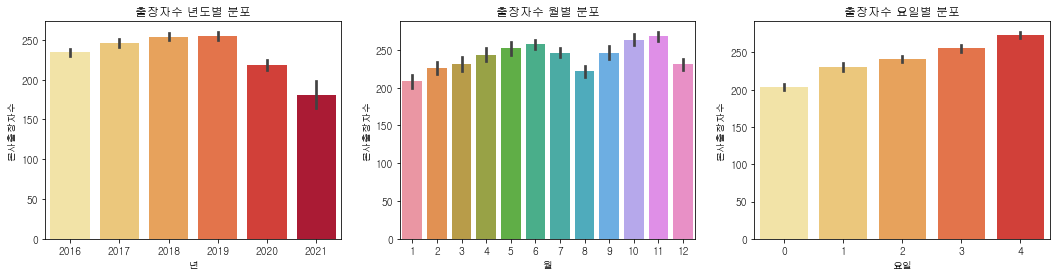

In [17]:
fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
sns.barplot(x='년', y='본사출장자수', data=train, ax = ax[0]).set_title('출장자수 년도별 분포')
sns.barplot(x='월', y='본사출장자수', data=train, ax = ax[1]).set_title('출장자수 월별 분포')
sns.barplot(x='요일', y='본사출장자수', data=train, ax = ax[2]).set_title('출장자수 요일별 분포')
plt.show()

# 2020년 출장자수 감소 - 코로나 영향
# 8월 출장자수 최소
# 금요일 출장자수 최대

##### 본사시간외근무명령서승인건수

Text(0.5, 1.0, '본사시간외근무명령서승인건수 분포')

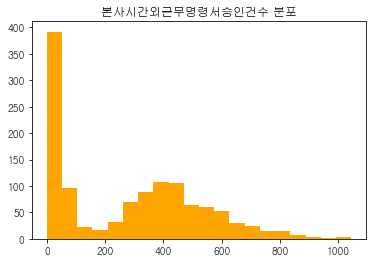

In [18]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['본사시간외근무명령서승인건수'], bins=20, color='orange')
axes1.set_title('본사시간외근무명령서승인건수 분포')

# 초과근무수 0 ~ 1000명, 없는 날 대부분

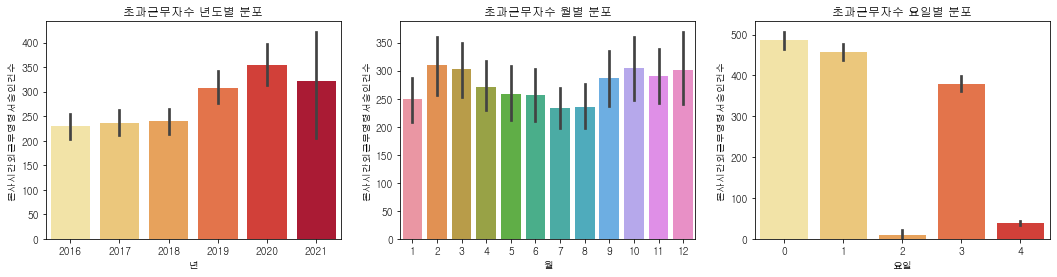

In [19]:
fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
sns.barplot(x='년', y='본사시간외근무명령서승인건수', data=train, ax = ax[0]).set_title('초과근무자수 년도별 분포')
sns.barplot(x='월', y='본사시간외근무명령서승인건수', data=train, ax = ax[1]).set_title('초과근무자수 월별 분포')
sns.barplot(x='요일', y='본사시간외근무명령서승인건수', data=train, ax = ax[2]).set_title('초과근무자수 요일별 분포')
plt.show()

# 초과근무수 증가 추세
# 7,8월 초과근무자수 최소
# 수요일 초과근무자수 최소 (매달 마지막주 수요일=자기 계발의 날, 정시퇴근)

##### 현본사소속재택근무자수

In [20]:
train[['현본사소속재택근무자수', '중식계', '석식계']] = train[['현본사소속재택근무자수', '중식계', '석식계']].astype('int')
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype('int')

Text(0.5, 1.0, '현본사소속재택근무자수 분포')

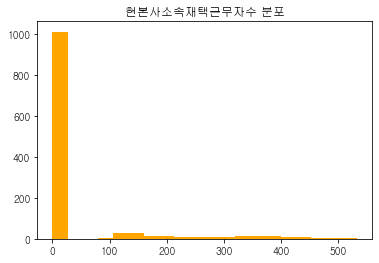

In [21]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['현본사소속재택근무자수'], bins=20, color='orange')
axes1.set_title('현본사소속재택근무자수 분포')

# 없는 날 대부분

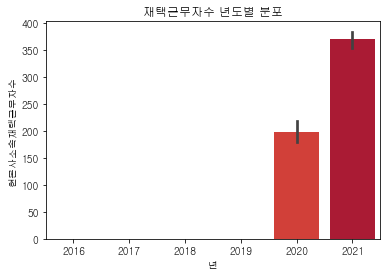

In [22]:
fig, ax=plt.subplots()
sns.barplot(x='년', y='현본사소속재택근무자수', data=train).set_title('재택근무자수 년도별 분포')
plt.show()

# 2020,21년만 재택근무자 존재 - 코로나 영향

##### 중식계 및 석식계

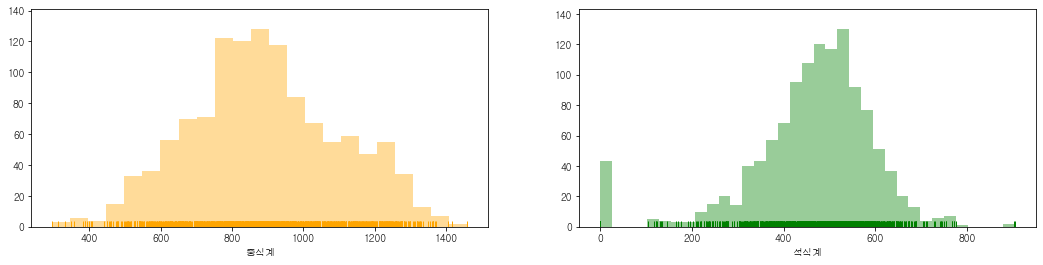

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train['중식계'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train['석식계'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

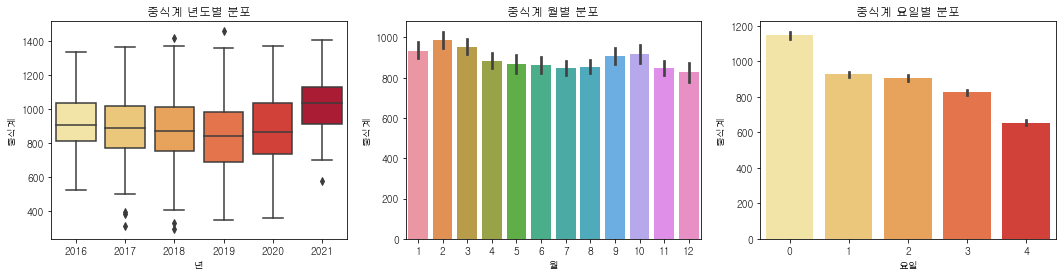

In [24]:
fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
sns.boxplot(x='년', y='중식계', data=train, ax = ax[0]).set_title('중식계 년도별 분포')
sns.barplot(x='월', y='중식계', data=train, ax = ax[1]).set_title('중식계 월별 분포')
sns.barplot(x='요일', y='중식계', data=train, ax = ax[2]).set_title('중식계 요일별 분포')
plt.show()

# 12월 연말에 중식계 최소
# 월요일 최대, 금요일 최소

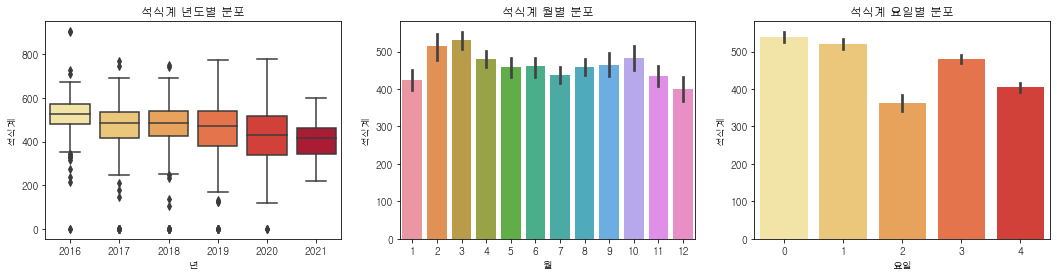

In [25]:
fig, ax=plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
sns.boxplot(x='년', y='석식계', data=train, ax = ax[0]).set_title('석식계 년도별 분포')
sns.barplot(x='월', y='석식계', data=train, ax = ax[1]).set_title('석식계 월별 분포')
sns.barplot(x='요일', y='석식계', data=train, ax = ax[2]).set_title('석식계 요일별 분포')
plt.show()

# 년도별 석식계 감소 추세
# 12월,1월 연말연시 최소
# 수요일 최소

##### 비율

In [26]:
train['출근'] = train['본사정원수']-(train['본사휴가자수']+train['본사출장자수']+train['현본사소속재택근무자수'])
test['출근'] = test['본사정원수']-(test['본사휴가자수']+test['본사출장자수']+test['현본사소속재택근무자수'])

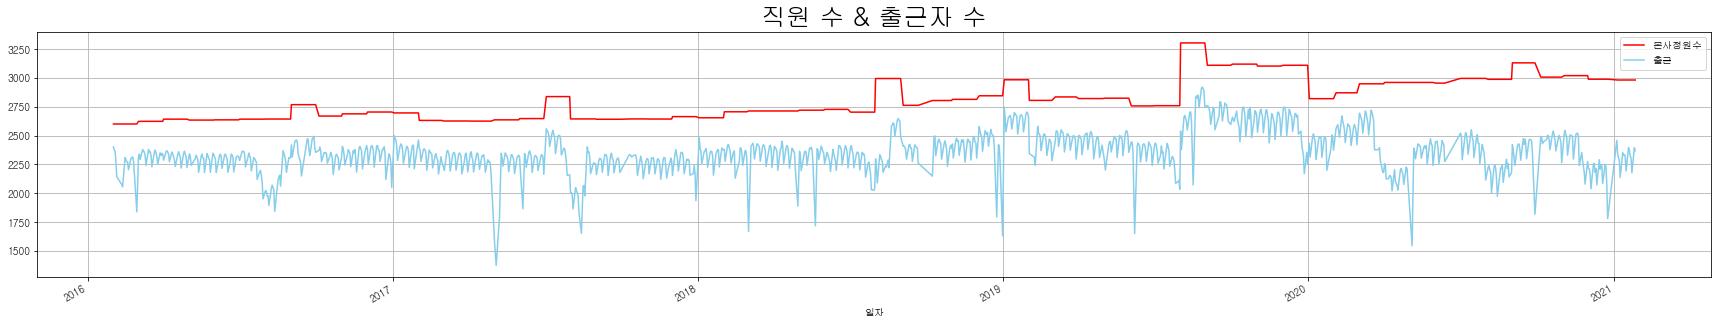

In [27]:
train1 = train[['일자','본사정원수','출근']]
train1.plot(x = '일자', y = ['본사정원수','출근'], figsize = (30, 5), grid = True, color=['red','skyblue'])
plt.title('직원 수 & 출근자 수', fontsize = 25)
plt.show()

Text(0.5, 1.0, '출근 분포')

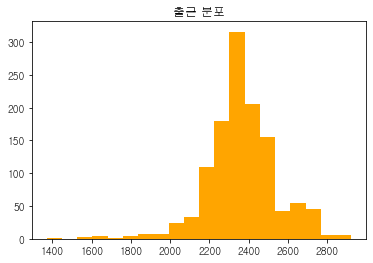

In [28]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(train['출근'], bins=20, color='orange')
axes1.set_title('출근 분포')

# 주로 2000~2500명 출근

In [29]:
train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
train['출장비율'] = train['본사출장자수']/train['본사정원수']
train['초과근무비율'] = train['본사시간외근무명령서승인건수']/train['출근']
train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']

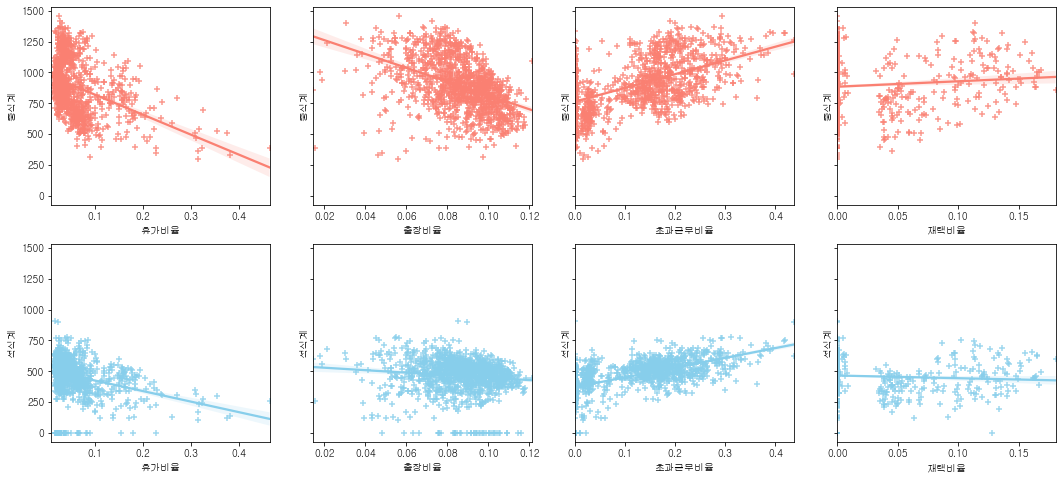

In [30]:
fig, ax = plt.subplots(figsize = (18, 8), ncols = 4, nrows = 2, sharey=True)
plt.rcParams['font.size'] = 12
sns.color_palette("Paired")
train_features = ['휴가비율', '출장비율', '초과근무비율', '재택비율', '휴가비율', '출장비율', '초과근무비율', '재택비율']
for i, feature in enumerate(train_features):
    row = int(i/4)
    col = i%4 
    if i < 4:
        sns.regplot(x=feature, y = '중식계', data = train, ax = ax[row][col], color = 'salmon', marker = '+')
    else: 
        sns.regplot(x=feature, y = '석식계', data = train, ax = ax[row][col], color = 'skyblue', marker = '+')
        
# 초과근무비율의 상관성 높음

In [31]:
test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
test['출장비율'] = test['본사출장자수']/test['본사정원수']
test['초과근무비율'] = test['본사시간외근무명령서승인건수']/test['출근']
test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

### 4. 데이터 모델링

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   int64         
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   int32         
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   int32         
 11  석식계             1205 non-null   int32         
 12  년               1205 non-null   int64         
 13  월               1205 non-null   int64         
 14  일               1205 non-null   int64         
 15  주   

In [33]:
train = train.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1)
test = test.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1)

lunch = train.drop('석식계',axis=1)
lunchtest=test

dinner = train.drop('중식계',axis=1)
dinnertest = test

In [34]:
dinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   int64         
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   int32         
 7   석식계             1205 non-null   int32         
 8   년               1205 non-null   int64         
 9   월               1205 non-null   int64         
 10  일               1205 non-null   int64         
 11  주               1205 non-null   int64         
 12  출근              1205 non-null   int64         
 13  휴가비율            1205 non-null   float64       
 14  출장비율            1205 non-null   float64       
 15  초과근무

In [35]:
dinnertest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     int64         
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     int32         
 7   년               50 non-null     int64         
 8   월               50 non-null     int64         
 9   일               50 non-null     int64         
 10  주               50 non-null     int64         
 11  출근              50 non-null     int64         
 12  휴가비율            50 non-null     float64       
 13  출장비율            50 non-null     float64       
 14  초과근무비율          50 non-null     float64       
 15  재택비율    

##### pycaret 라이브러리 : AutoML

In [36]:
import pycaret
from pycaret.regression import *

reg = setup(data = lunch, target = '중식계', numeric_imputation = 'mean', normalize = True, silent = True , session_id = 5137,  folds_shuffle=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5137
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1205, 17)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


##### 모델 학습 및 비교

In [37]:
best5 = compare_models(sort= 'MAE',n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,65.7222,7866.7312,88.1760,0.8172,0.1083,0.0794,5.3487
1,Gradient Boosting Regressor,67.1740,8105.3700,89.5674,0.8109,0.1095,0.0809,0.6622
2,Extreme Gradient Boosting,71.1989,9240.6177,95.6653,0.7838,0.1159,0.0847,0.5388
3,Random Forest,72.0396,9570.3002,97.0822,0.7776,0.1195,0.0874,0.8858
4,Light Gradient Boosting Machine,72.6404,9247.3501,95.6011,0.7857,0.1172,0.0871,0.2143
5,Linear Regression,72.7402,9502.6412,96.9178,0.7795,0.1165,0.0868,0.0448
6,Ridge Regression,72.8407,9433.5483,96.5929,0.7811,0.1162,0.0868,0.0109
7,Extra Trees Regressor,73.1645,9871.1618,98.7860,0.7699,0.1202,0.0881,0.6391
8,Bayesian Ridge,73.3736,9466.6174,96.7662,0.7803,0.1170,0.0877,0.0867
9,Lasso Regression,74.2646,9633.3113,97.5403,0.7765,0.1190,0.0892,0.0239


##### 모델 앙상블

In [38]:
blended_l = blend_models(estimator_list= best5, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, lunchtest)

In [39]:
submission['중식계']=pred_esb_l['Label']
reg = setup(data = dinner, target = '석식계',numeric_imputation = 'mean', normalize = True, silent = True,  session_id = 4859,  folds_shuffle=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4859
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1205, 17)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [40]:
best5 = compare_models(sort= 'MAE',n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,53.9167,6523.9804,79.7277,0.6511,0.8516,0.1187,0.6929
1,CatBoost Regressor,55.8817,6574.9008,80.1165,0.6488,0.9408,0.1218,5.3260
2,Random Forest,55.8921,6626.4891,80.6371,0.6487,0.9247,0.1229,0.9099
3,Light Gradient Boosting Machine,58.1615,7033.8587,83.2915,0.6221,0.9277,0.1278,0.2293
4,Gradient Boosting Regressor,59.4352,7315.8839,84.7665,0.6117,0.9951,0.1262,0.6468
5,Extreme Gradient Boosting,60.2348,7413.3923,85.0902,0.6024,0.9588,0.1300,0.5589
6,Huber Regressor,60.5143,9919.4095,97.9226,0.4914,1.1074,0.1151,0.3341
7,Random Sample Consensus,62.7083,16159.7247,114.9152,0.1983,1.1229,0.1149,2.9813
8,Lasso Regression,65.4753,9260.2137,95.2933,0.5166,1.0821,0.1289,0.1105
9,Bayesian Ridge,66.0833,9215.1102,95.0531,0.5182,1.0781,0.1310,0.0920


In [41]:
blended_l = blend_models(estimator_list= best5, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, dinnertest)

In [42]:
submission['석식계']=pred_esb_l['Label']

In [43]:
submission.to_csv('submit.csv', index=False)